In [8]:
import pandas as pd

# Load the Excel file
df = pd.read_csv('co2_emissions.csv')

# Filter out rows based on conditions in 'Unit' and 'Industry' columns
df = df[~df['Unit'].str.contains('Metric Tons of CO2 Emissions per $1million USD of output')]
df = df[~df['Industry'].str.contains('Activities of households as employers; undifferentiated goods- and services-producing activities of households for own use')]

# Drop the specified columns
columns_to_drop = ['ObjectId', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 
                   'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'Industry', 'Scale']
df = df.drop(columns=columns_to_drop)

# Group by 'Country' and calculate the sum for the year columns, while keeping NaN as NaN
year_columns = [f'F{year}' for year in range(1995, 2023)]  # F1995 to F2022
grouped_df = df.groupby('Country')[year_columns].sum(min_count=1).reset_index()  # min_count=1 ensures NaN isn't converted to 0

# Save the resulting DataFrame to a CSV file
grouped_df.to_csv('cleaned_co2_emissions.csv', index=False)

print(f"Updated data saved as cleaned_co2_emissions.csv")


Updated data saved as cleaned_co2_emissions.csv


In [10]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('disaster_frequency.csv')

# Remove rows where the 'Indicator' column contains specific values
indicators_to_remove = [
    'Climate related disasters frequency, Number of Disasters: Drought',
    'Climate related disasters frequency, Number of Disasters: Extreme temperature',
    'Climate related disasters frequency, Number of Disasters: Flood',
    'Climate related disasters frequency, Number of Disasters: Landslide',
    'Climate related disasters frequency, Number of Disasters: Storm',
    'Climate related disasters frequency, Number of Disasters: Wildfire'
]

df = df[~df['Indicator'].isin(indicators_to_remove)]

# Drop specified columns
columns_to_drop = ['ObjectId', 'ISO2', 'ISO3','Indicator', 'Unit', 'Source', 
                   'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 
                   'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 
                   'F1985', 'F1986', 'F1987', 'F1988', 'F1989', 
                   'F1990', 'F1991', 'F1992', 'F1993', 'F1994']
df = df.drop(columns=columns_to_drop)

# Save the resulting DataFrame to a new CSV file
df.to_csv('cleaned_disaster_frequency.csv', index=False)

print("Updated disaster frequency data saved as cleaned_disaster_frequency.csv")


Updated disaster frequency data saved as cleaned_disaster_frequency.csv


In [12]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('informed_risk.csv')



# Remove rows where the 'Indicator' column contains specific values
indicators_to_remove = [
    'Climate-driven Hazard & Exposure',
    'Lack of coping capacity',
    'Vulnerability'
]
df = df[~df['Indicator'].isin(indicators_to_remove)]

# Drop the 'Indicator' column as it's no longer needed
df = df.drop(columns=['Indicator'])
# Drop the 'Unit' column
df = df.drop(columns=['Unit'])

# Save the resulting DataFrame to a new CSV file
df.to_csv('cleaned_informed_risk.csv', index=False)

print("Updated informed risk data saved as cleaned_informed_risk.csv")


Updated informed risk data saved as cleaned_informed_risk.csv


In [14]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('temperature_change.csv')

# List of columns to drop
columns_to_drop = [
    'ObjectId', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 
    'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 
    'F1961', 'F1962', 'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 
    'F1969', 'F1970', 'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 
    'F1977', 'F1978', 'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 
    'F1985', 'F1986', 'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 
    'F1993', 'F1994'
]

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Save the resulting DataFrame to a new CSV file
df.to_csv('cleaned_temperature_change.csv', index=False)

print("Updated temperature change data saved as cleaned_temperature_change.csv")


Updated temperature change data saved as cleaned_temperature_change.csv


In [16]:
import pandas as pd

# Load the cleaned datasets
df_co2 = pd.read_csv('cleaned_co2_emissions.csv')
df_disaster = pd.read_csv('cleaned_disaster_frequency.csv')
df_informed_risk = pd.read_csv('cleaned_informed_risk.csv')
df_temp_change = pd.read_csv('cleaned_temperature_change.csv')

# Extract the 'Country' columns (assuming 'Country' is the name of the column containing countries)
countries_co2 = set(df_co2['Country'])
countries_disaster = set(df_disaster['Country'])
countries_informed_risk = set(df_informed_risk['Country'])
countries_temp_change = set(df_temp_change['Country'])

# Find the common countries across all datasets
common_countries = countries_co2 & countries_disaster & countries_informed_risk & countries_temp_change

# Filter each dataset to only include the common countries
df_co2_filtered = df_co2[df_co2['Country'].isin(common_countries)]
df_disaster_filtered = df_disaster[df_disaster['Country'].isin(common_countries)]
df_informed_risk_filtered = df_informed_risk[df_informed_risk['Country'].isin(common_countries)]
df_temp_change_filtered = df_temp_change[df_temp_change['Country'].isin(common_countries)]

# Save the updated datasets as new files
df_co2_filtered.to_csv('updated_cleaned_co2_emissions.csv', index=False)
df_disaster_filtered.to_csv('updated_cleaned_disaster_frequency.csv', index=False)
df_informed_risk_filtered.to_csv('updated_cleaned_informed_risk.csv', index=False)
df_temp_change_filtered.to_csv('updated_cleaned_temperature_change.csv', index=False)

print("Updated datasets have been saved.")


Updated datasets have been saved.


In [30]:
import pandas as pd

# Load the cleaned datasets
df_co2 = pd.read_csv('cleaned_co2_emissions.csv')
df_disaster = pd.read_csv('cleaned_disaster_frequency.csv')
df_informed_risk = pd.read_csv('cleaned_informed_risk.csv')
df_temp_change = pd.read_csv('cleaned_temperature_change.csv')

# Extract the 'Country' columns (assuming 'Country' is the name of the column containing countries)
countries_co2 = set(df_co2['Country'])
countries_disaster = set(df_disaster['Country'])
countries_informed_risk = set(df_informed_risk['Country'])
countries_temp_change = set(df_temp_change['Country'])

# Find the common countries across all datasets
common_countries = countries_co2 & countries_disaster & countries_informed_risk & countries_temp_change

# Print the list of common countries
print("Common Countries Across All Datasets:")
for country in sorted(common_countries):
    print(country)

# Filter each dataset to only include the common countries
df_co2_filtered = df_co2[df_co2['Country'].isin(common_countries)]
df_disaster_filtered = df_disaster[df_disaster['Country'].isin(common_countries)]
df_informed_risk_filtered = df_informed_risk[df_informed_risk['Country'].isin(common_countries)]
df_temp_change_filtered = df_temp_change[df_temp_change['Country'].isin(common_countries)]

# Save the updated datasets as new files
df_co2_filtered.to_csv('updated_cleaned_co2_emissions.csv', index=False)
df_disaster_filtered.to_csv('updated_cleaned_disaster_frequency.csv', index=False)
df_informed_risk_filtered.to_csv('updated_cleaned_informed_risk.csv', index=False)
df_temp_change_filtered.to_csv('updated_cleaned_temperature_change.csv', index=False)

print("\nUpdated datasets have been saved.")


Common Countries Across All Datasets:
Australia
Austria
Belgium
Bulgaria
Canada
Croatia, Rep. of
Cyprus
Czech Rep.
Denmark
Estonia, Rep. of
Finland
France
Germany
Greece
Hungary
Iceland
Ireland
Italy
Japan
Korea, Rep. of
Latvia
Lithuania
Luxembourg
Netherlands, The
New Zealand
Norway
Poland, Rep. of
Portugal
Romania
Slovak Rep.
Slovenia, Rep. of
Spain
Sweden
Switzerland
United Kingdom
United States

Updated datasets have been saved.


In [26]:
import pandas as pd

# Function to calculate and print the total sums for specific years
def calculate_sums(file_path, target_years):
    # Read the dataset
    df = pd.read_csv('final_co2_emissions.csv')
    
    # Sum the values across all countries for each year
    df_sum = df.drop(columns=['Country']).sum()
    
    # Extract sums for the target years
    calculated_sums = {year: df_sum[year] for year in target_years}
    
    # Print the calculated sums for the target years
    print(f"Calculated Sums for {file_path.split('/')[-1]}:")
    for year, total in calculated_sums.items():
        print(f"{year}: {total}")
    
    return calculated_sums

# Specify the years of interest
target_years = ['F2015', 'F2016', 'F2017', 'F2018','F2019', 'F2020', 'F2021', 'F2022']

# Calculate and print the sums for final_co2_emissions.csv
calculated_sums = calculate_sums('final_co2_emissions.csv', target_years)


Calculated Sums for final_co2_emissions.csv:
F2015: 936480.019418226
F2016: 1287937.6698718367
F2017: 958985.2144476129
F2018: 732626.362667596
F2019: 438454.25568629085
F2020: 364951.8113750484
F2021: 291449.3670638052
F2022: 217946.92275256116


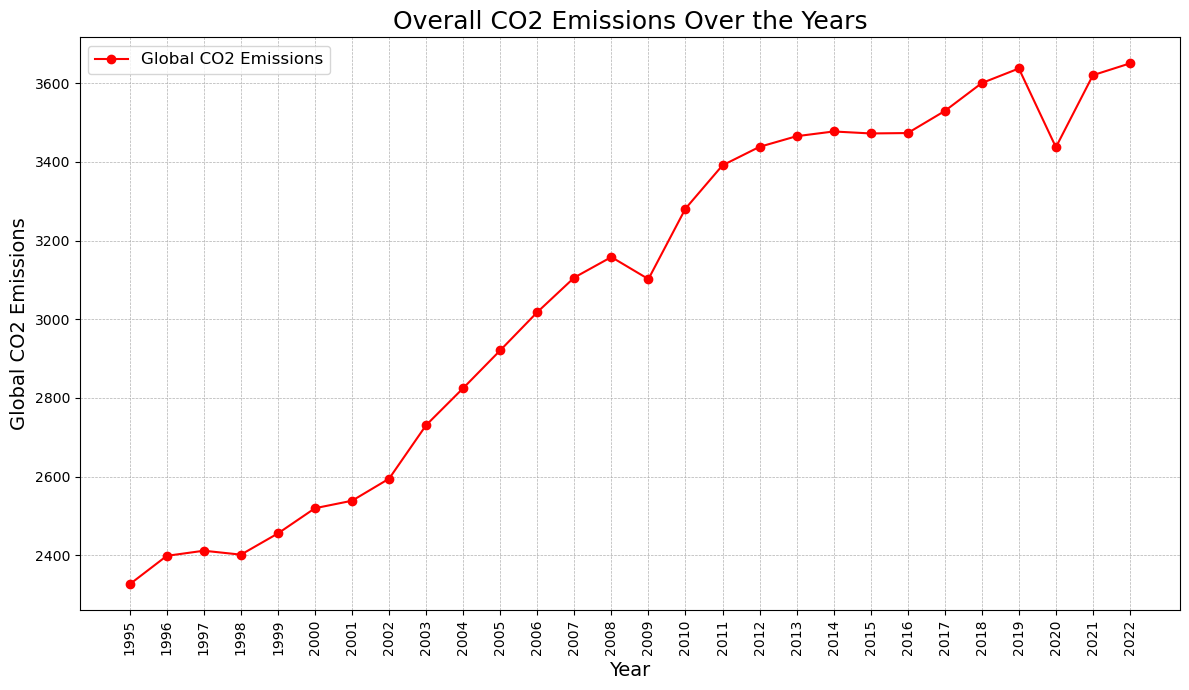

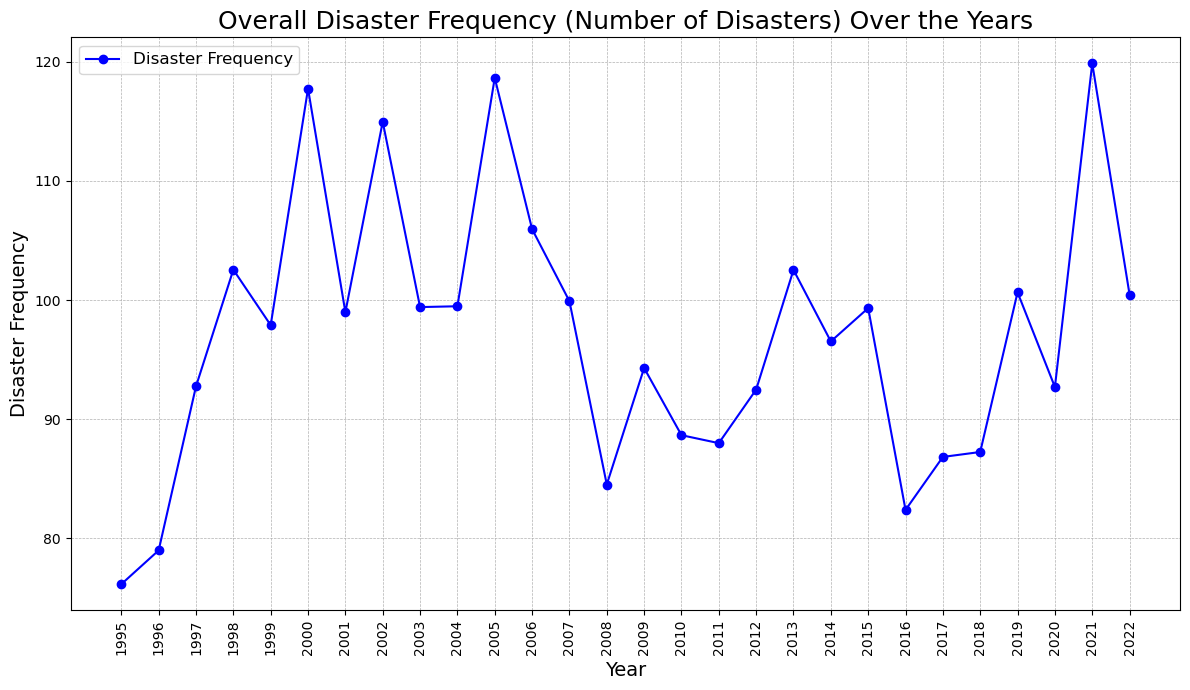

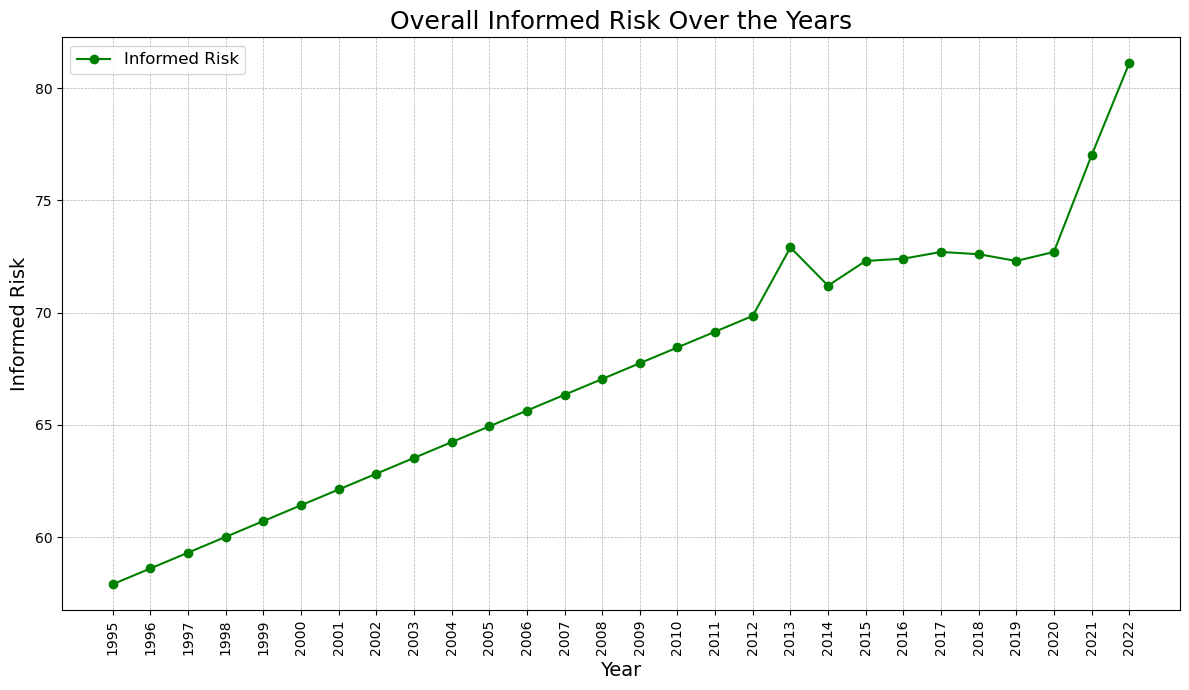

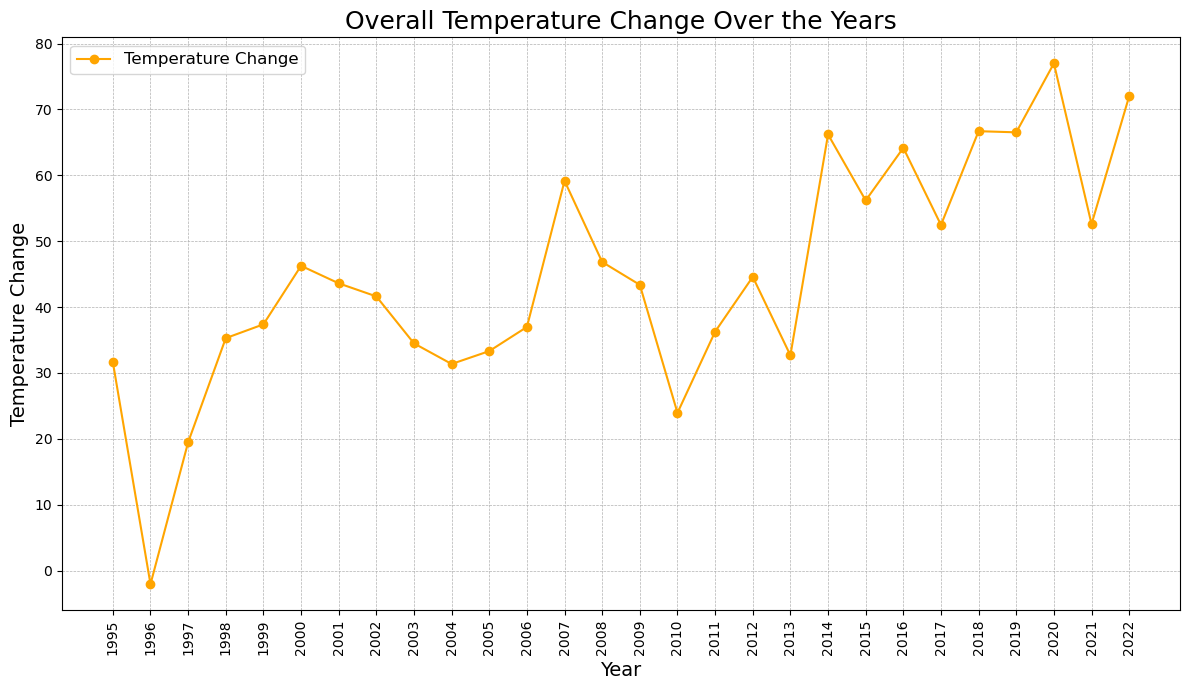

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to process and plot a dataset
def process_and_plot_dataset(file_path, save_path, value_label, title, color):
    # Read the dataset
    df = pd.read_csv(file_path)
    
    # Drop the 'Country' column and sum the values across all years
    df_sum = df.drop(columns=['Country']).sum()
    
    # Save the processed data to a new file
    processed_df = pd.DataFrame({
        'Year': [int(col[1:]) for col in df_sum.index],  # Extract years
        value_label: df_sum.values  # Sum values
    })
    processed_df.to_csv(save_path, index=False)  # Save the file
    
    # Plot the overall values over the years
    plt.figure(figsize=(12, 7))
    plt.plot(processed_df['Year'], processed_df[value_label], marker='o', color=color, label=value_label)
    plt.title(title, fontsize=18)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel(value_label, fontsize=14)
    
    # Adjusting the x-axis to show each year explicitly
    plt.xticks(processed_df['Year'], rotation=90, fontsize=10)
    
    # Adding grid lines
    plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
    
    plt.legend(fontsize=12)
    plt.tight_layout()  # Ensure no labels are cut off
    plt.show()

def plot(file_path, value_label, title, color):
    df = pd.read_csv(file_path)
    
    # Sum the values across all years (since the dataset already has the sum per year)
    df_sum = df.sum()
    
    # Extract years from the column names (e.g., F1997 -> 1997)
    years = [int(col[1:]) for col in df_sum.index]
    plt.figure(figsize=(12, 7))
    plt.plot(years, df_sum.values, marker='o', color=color, label=value_label)
    plt.title(title, fontsize=18)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel(value_label, fontsize=14)
    
    # Adjusting the x-axis to show each year explicitly
    plt.xticks(years, rotation=90, fontsize=10)
    
    # Adding grid lines
    plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
    
    plt.legend(fontsize=12)
    plt.tight_layout()  # Ensure no labels are cut off
    plt.show()

plot(
    'global_co2.csv',
    value_label='Global CO2 Emissions',
    title='Overall CO2 Emissions Over the Years',
    color='red'
)

process_and_plot_dataset(
    'final_disaster_frequency.csv',
    'processed_disaster_frequency.csv',  # Save path for processed file
    value_label='Disaster Frequency',
    title='Overall Disaster Frequency (Number of Disasters) Over the Years',
    color='blue'
)

process_and_plot_dataset(
    'final_informed_risk.csv',
    'processed_informed_risk.csv',  # Save path for processed file
    value_label='Informed Risk',
    title='Overall Informed Risk Over the Years',
    color='green'
)

process_and_plot_dataset(
    'final_temperature_change.csv',
    'processed_temperature_change.csv',  # Save path for processed file
    value_label='Temperature Change',
    title='Overall Temperature Change Over the Years',
    color='orange'
)

In [25]:
import pandas as pd

def update_global_co2(file_path, save_path, value_label):
    # Read the dataset
    df = pd.read_csv(file_path)

    # Assume the second row (index 1) contains the total values for CO2 emissions
    co2_values = df.iloc[0].values  # Get the first row of data
    
    # Extract years from column headers
    years = [int(col[1:]) for col in df.columns]

    # Create a new DataFrame with the desired format
    updated_df = pd.DataFrame({
        'Year': years,
        value_label: co2_values
    })

    # Save the updated dataset
    updated_df.to_csv(save_path, index=False)

    print(f"Dataset has been updated and saved to {save_path}.")

# File paths
file_path = 'global_co2.csv'  # Path to the original dataset
save_path = 'updated_global_co2.csv'  # Path to save the updated dataset

# Update the dataset
update_global_co2(file_path, save_path, value_label='CO2 Emissions')


Dataset has been updated and saved to updated_global_co2.csv.


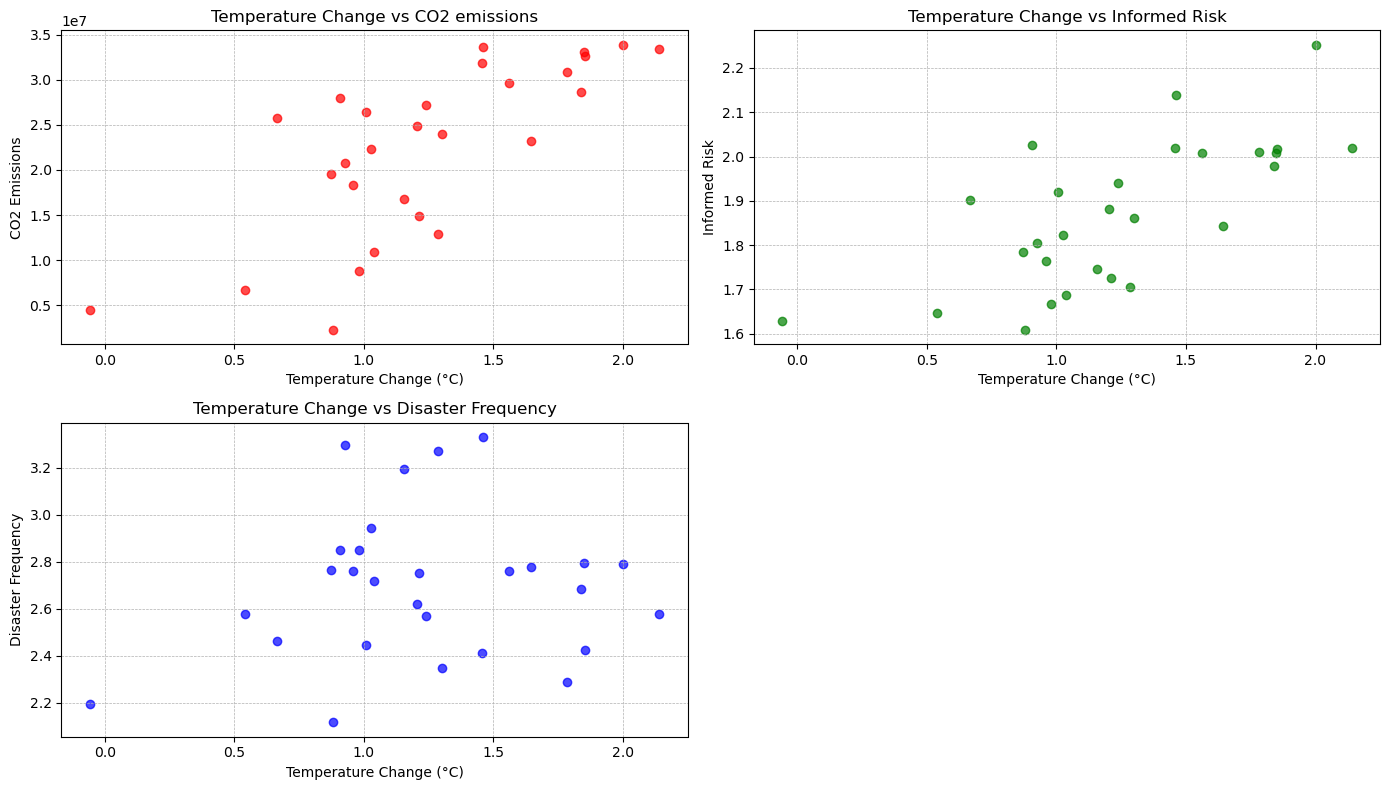

Correlation between Temperature Change and CO2 emissions: 0.7395
Correlation between Temperature Change and Informed Risk: 0.7104
Correlation between Temperature Change and Disaster Frequency: 0.1152


In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
co2_df = pd.read_csv('final_co2_emissions.csv')
temp_df = pd.read_csv('final_temperature_change.csv')
risk_df = pd.read_csv('final_informed_risk.csv')
disaster_df = pd.read_csv('final_disaster_frequency.csv')

# Ensure the columns align and process data
co2_yearly = co2_df.drop(columns=['Country']).sum()  # Total CO2 emissions per year
temp_yearly = temp_df.drop(columns=['Country']).mean()  # Average temperature change per year
risk_yearly = risk_df.drop(columns=['Country']).mean()  # Average informed risk per year
disaster_yearly = disaster_df.drop(columns=['Country']).mean()  # Average disaster frequency per year

# Extract years from the column names
years = [int(col[1:]) for col in co2_yearly.index]

# Calculate cumulative CO2 emissions
cumulative_co2 = co2_yearly.cumsum()

# Plot temperature change vs CO2 emissions, informed risk, and disaster frequency
plt.figure(figsize=(14, 8))

# Scatter plot for Temperature Change vs Cumulative CO2
plt.subplot(2, 2, 1)
plt.scatter(temp_yearly, cumulative_co2, color='red', alpha=0.7)
plt.title('Temperature Change vs CO2 emissions', fontsize=12)
plt.xlabel('Temperature Change (°C)', fontsize=10)
plt.ylabel('CO2 Emissions', fontsize=10)
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# Scatter plot for Temperature Change vs Informed Risk
plt.subplot(2, 2, 2)
plt.scatter(temp_yearly, risk_yearly, color='green', alpha=0.7)
plt.title('Temperature Change vs Informed Risk', fontsize=12)
plt.xlabel('Temperature Change (°C)', fontsize=10)
plt.ylabel('Informed Risk', fontsize=10)
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# Scatter plot for Temperature Change vs Disaster Frequency
plt.subplot(2, 2, 3)
plt.scatter(temp_yearly, disaster_yearly, color='blue', alpha=0.7)
plt.title('Temperature Change vs Disaster Frequency', fontsize=12)
plt.xlabel('Temperature Change (°C)', fontsize=10)
plt.ylabel('Disaster Frequency', fontsize=10)
plt.grid(visible=True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

# Calculate the correlation coefficients
correlation_co2_temp = temp_yearly.corr(cumulative_co2)
correlation_risk_temp = temp_yearly.corr(risk_yearly)
correlation_disaster_temp = temp_yearly.corr(disaster_yearly)

# Print the correlation coefficients
print(f'Correlation between Temperature Change and CO2 emissions: {correlation_co2_temp:.4f}')
print(f'Correlation between Temperature Change and Informed Risk: {correlation_risk_temp:.4f}')
print(f'Correlation between Temperature Change and Disaster Frequency: {correlation_disaster_temp:.4f}')


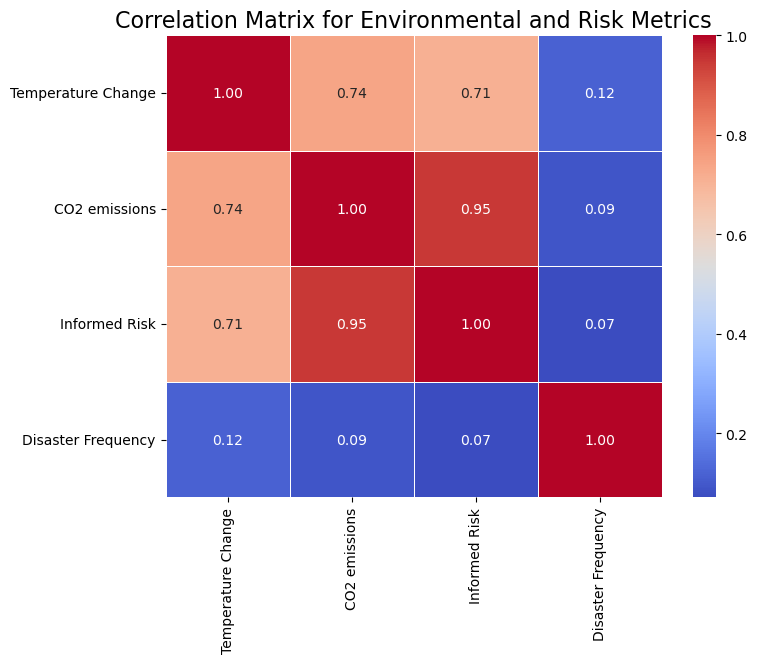

Correlation Matrix:
                    Temperature Change  CO2 emissions  Informed Risk  \
Temperature Change            1.000000       0.739472       0.710407   
CO2 emissions                 0.739472       1.000000       0.947993   
Informed Risk                 0.710407       0.947993       1.000000   
Disaster Frequency            0.115180       0.089786       0.071530   

                    Disaster Frequency  
Temperature Change            0.115180  
CO2 emissions                 0.089786  
Informed Risk                 0.071530  
Disaster Frequency            1.000000  


In [40]:
# Combine all data into a single DataFrame
data = pd.DataFrame({
    'Temperature Change': temp_yearly,
    'CO2 emissions': cumulative_co2,
    'Informed Risk': risk_yearly,
    'Disaster Frequency': disaster_yearly
})

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=0.5)
plt.title('Correlation Matrix for Environmental and Risk Metrics', fontsize=16)
plt.show()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Processing processed_temperature_change.csv...
Best Model: Linear
R-squared (Linear): 0.5766
R-squared (Exponential): 0.3934
   Year  Forecasted Values
0  2023          65.429674
1  2024          66.986228
2  2025          68.542782
3  2026          70.099335
4  2027          71.655889
5  2028          73.212443
6  2029          74.768997
7  2030          76.325551


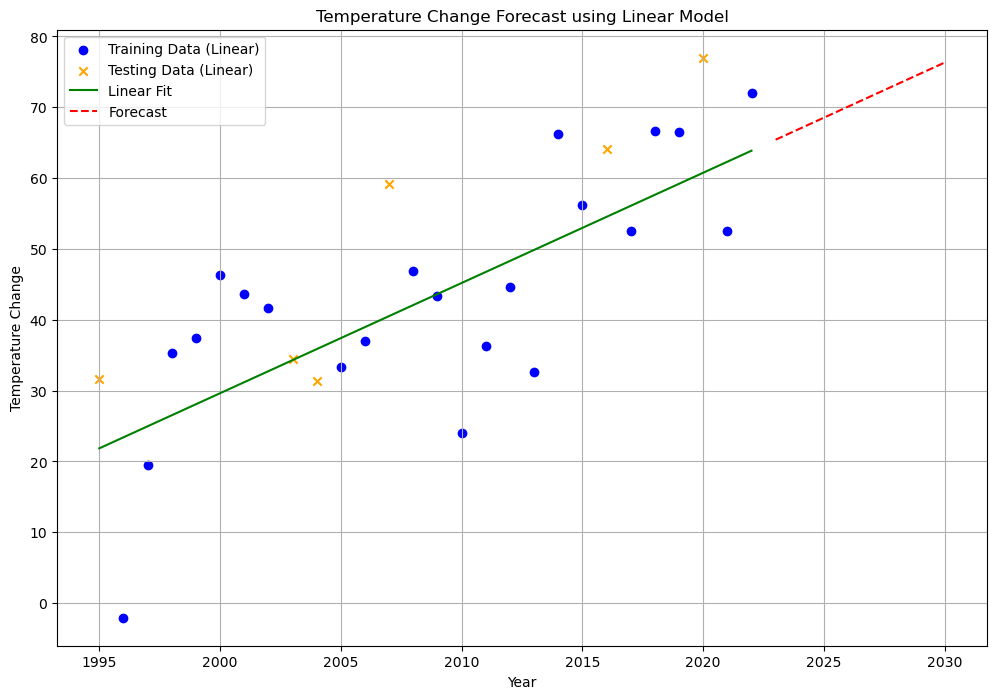

Processing updated_global_co2.csv...
Best Model: Linear
R-squared (Linear): 0.8955
R-squared (Exponential): 0.8763
   Year  Forecasted Values
0  2023        3903.022794
1  2024        3959.842288
2  2025        4016.661781
3  2026        4073.481275
4  2027        4130.300768
5  2028        4187.120262
6  2029        4243.939756
7  2030        4300.759249


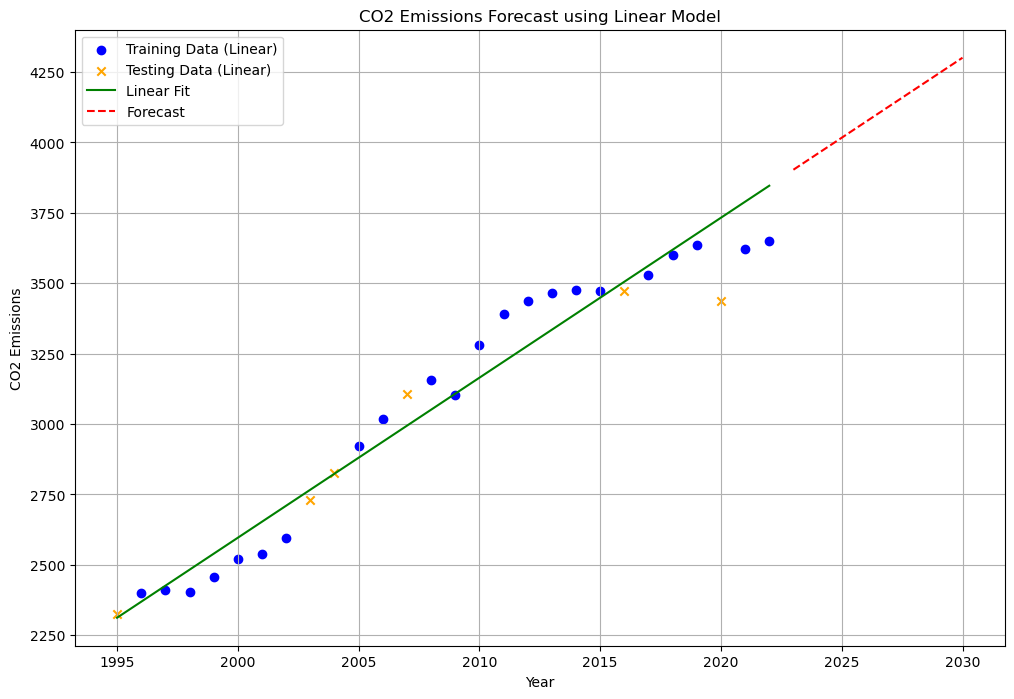

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define regression models
def linear_model(x, a, b):
    return a * x + b

def exponential_model(x, a, b):
    return a * np.exp(b * x)

# Fit and evaluate a model
def fit_and_evaluate_model(model_func, x_train, y_train, x_test, y_test, initial_guess=None):
    try:
        if model_func == exponential_model and initial_guess is not None:
            params, _ = curve_fit(model_func, x_train, y_train, p0=initial_guess, maxfev=10000)
        else:
            params = np.polyfit(x_train, y_train, 1)
        y_test_pred = model_func(x_test, *params)
        r_squared = r2_score(y_test, y_test_pred)
        return params, r_squared
    except RuntimeError:
        return None, -np.inf

# Main regression function
def apply_regression(file_path, y_label, forecast_years_end):
    # Load and preprocess data
    data = pd.read_csv(file_path)
    if 'Year' not in data.columns or y_label not in data.columns:
        print(f"Missing required columns in {file_path}. Skipping...")
        return
    data = data.dropna(subset=['Year', y_label])  # Drop rows with missing values
    x_data = np.array(data['Year'], dtype=float)
    y_data = np.array(data[y_label], dtype=float)

    # Handle non-positive values for exponential fitting
    positive_indices = y_data > 0
    x_data_exp = x_data[positive_indices]
    y_data_exp = y_data[positive_indices]

    # Split data into training and testing
    x_train_lin, x_test_lin, y_train_lin, y_test_lin = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
    x_train_exp, x_test_exp, y_train_exp, y_test_exp = train_test_split(x_data_exp, y_data_exp, test_size=0.2, random_state=42)

    # Fit and evaluate models
    lin_params, r_squared_lin = fit_and_evaluate_model(linear_model, x_train_lin, y_train_lin, x_test_lin, y_test_lin)
    exp_params, r_squared_exp = fit_and_evaluate_model(exponential_model, x_train_exp, y_train_exp, x_test_exp, y_test_exp, initial_guess=(y_train_exp[0], 0.01))

    # Select best model
    if r_squared_lin > r_squared_exp:
        best_model = "Linear"
        params = lin_params
        forecast_model = linear_model
    else:
        best_model = "Exponential"
        params = exp_params
        forecast_model = exponential_model

    # Forecast future values
    forecast_start_year = int(max(x_data)) + 1
    forecast_years = np.arange(forecast_start_year, forecast_years_end + 1)
    forecast_values = forecast_model(forecast_years, *params)

    # Print results
    print(f"Best Model: {best_model}")
    print(f"R-squared (Linear): {r_squared_lin:.4f}")
    print(f"R-squared (Exponential): {r_squared_exp:.4f}")
    forecast_df = pd.DataFrame({'Year': forecast_years, 'Forecasted Values': forecast_values})
    print(forecast_df)

        # Visualization
    plt.figure(figsize=(12, 8))
    
    # Plot training data
    plt.scatter(x_train_lin, y_train_lin, label="Training Data (Linear)", color="blue", marker="o")
    
    # Plot testing data
    plt.scatter(x_test_lin, y_test_lin, label="Testing Data (Linear)", color="orange", marker="x")
    
    # Plot the best model fit
    if best_model == "Linear":
        plt.plot(x_data, linear_model(x_data, *lin_params), label="Linear Fit", color="green")
    else:
        plt.scatter(x_train_exp, y_train_exp, label="Training Data (Exponential)", color="blue", marker="o")
        plt.scatter(x_test_exp, y_test_exp, label="Testing Data (Exponential)", color="orange", marker="x")
        plt.plot(x_data_exp, exponential_model(x_data_exp, *exp_params), label="Exponential Fit", color="green")
    
    # Plot forecast
    plt.plot(forecast_years, forecast_values, label="Forecast", color="red", linestyle="--")
    
    # Final plot adjustments
    plt.title(f"{y_label} Forecast using {best_model} Model")
    plt.xlabel("Year")
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.show()


# Apply to all datasets
datasets = {
    'processed_temperature_change.csv': 'Temperature Change',
    'updated_global_co2.csv': 'CO2 Emissions',
}

for file_path, y_label in datasets.items():
    print(f"Processing {file_path}...")
    apply_regression(file_path, y_label, forecast_years_end=2030)
